https://totoma3.tistory.com/201

https://github.com/ralaruri/p_median_python

https://dacon.io/codeshare/1358

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/통합 Data/복지비율 data.xlsx')   #데이터셋 불러오기

In [ ]:
df.shape

(31, 5)

In [ ]:
df.head()

,시군구,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율
0,가평군,0.01106,0.00589,0.000360,0.000060
1,고양시,0.00403,0.00351,0.000060,0.000087
2,과천시,0.00391,0.00680,0.000103,0.000103
3,광명시,0.00306,0.00384,0.000094,0.000142
4,광주시,0.00576,0.00372,0.000018,0.000018


In [ ]:
a=df['시군구'].values
a

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [ ]:
df=df.drop(['시군구'],axis=1)

In [ ]:
df

,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율
0,0.01106,0.00589,0.000360,0.000060
1,0.00403,0.00351,0.000060,0.000087
2,0.00391,0.00680,0.000103,0.000103
3,0.00306,0.00384,0.000094,0.000142
4,0.00576,0.00372,0.000018,0.000018
5,0.00545,0.00435,0.000146,0.000146
6,0.00376,0.00409,0.000107,0.000134
7,0.00606,0.00327,0.000033,0.000033
8,0.00585,0.00329,0.000038,0.000077
9,0.00675,0.00562,0.000051,0.000206


In [ ]:
df.columns

Index(['종합 복지시설 비율 ', '복지공무원 비율 ', '도시락 배달 비율', '무료 급식소 비율'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

In [ ]:
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.describe() # 기초통계량

,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,-1.396732e-16,-9.383175e-16,1.101270e-16,-6.983661e-17
std,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00
min,-1.133407e+00,-1.454368e+00,-8.775843e-01,-1.597638e+00
25%,-8.548321e-01,-8.483299e-01,-6.337138e-01,-8.006935e-01
50%,-2.536970e-01,-8.004564e-02,-3.898432e-01,-1.531761e-01
75%,7.594356e-01,7.311862e-01,1.900267e-01,8.014968e-01
max,2.268138e+00,2.076877e+00,3.598795e+00,1.972009e+00


In [ ]:
data_prime = scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

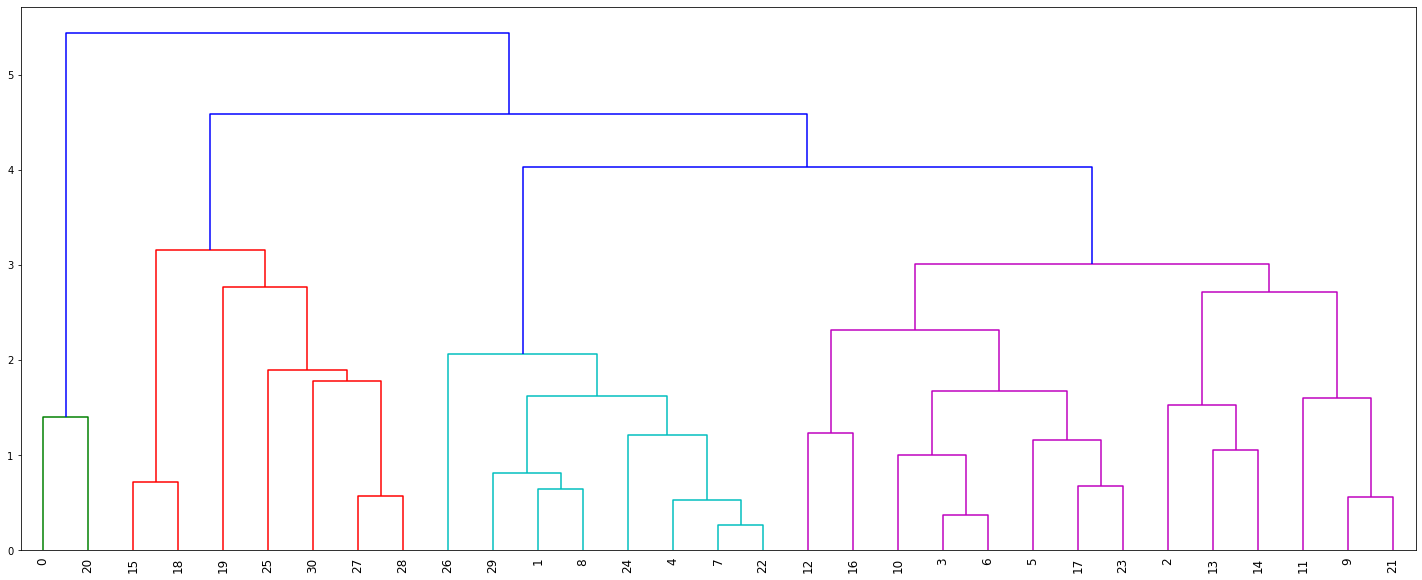

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=3.5, criterion='distance')
cut_tree

array([1, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 1, 4,
       3, 4, 3, 2, 3, 2, 2, 3, 2], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

4    14
3     8
2     7
1     2
dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.60529165 0.40437358 0.32244458 0.13780253 0.61598848] 
Silhouette Score shape: (31,) 

Silhouette Average Score:0.329


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율,hc_cluster,silhouette_coeff
0,1.212486,1.208381,2.829248,-0.601457,1,0.605292
1,-0.848967,-1.063068,-0.422359,-0.153176,3,0.404374
2,-0.884156,2.076877,0.043704,0.112472,4,0.322445
3,-1.133407,-0.748119,-0.053844,0.759989,4,0.137803
4,-0.341668,-0.862646,-0.877584,-1.298784,3,0.615988
5,-0.432571,-0.261380,0.509768,0.826401,4,0.320899
6,-0.928141,-0.509521,0.087059,0.627165,4,0.201916
7,-0.253697,-1.292121,-0.715004,-1.049739,3,0.663056
8,-0.315277,-1.273034,-0.660810,-0.319206,3,0.541444
9,-0.051364,0.950696,-0.519908,1.822582,4,0.378974


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.642875
2    0.149643
3    0.537476
4    0.255404
Name: silhouette_coeff, dtype: float64
표준편차: 0.23196339401947486


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
!pip install matplotlib==3.2.2

In [ ]:
pip install --upgrade seaborn

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

In [ ]:
data_prime.columns

Index(['종합 복지시설 비율 ', '복지공무원 비율 ', '도시락 배달 비율', '무료 급식소 비율', 'hc_cluster',
       'silhouette_coeff'],
      dtype='object')

Text(0, 0.5, '무료 급식소 비율')

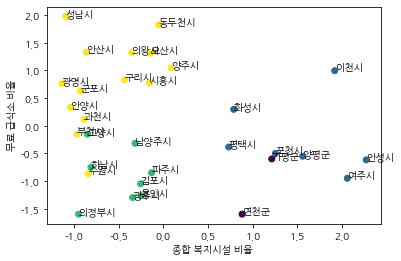

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['무료 급식소 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('무료 급식소 비율')



Text(0, 0.5, '도시락 배달 비율')

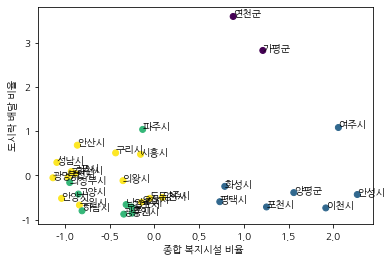

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['도시락 배달 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('도시락 배달 비율')

Text(0, 0.5, '복지공무원 비율 ')

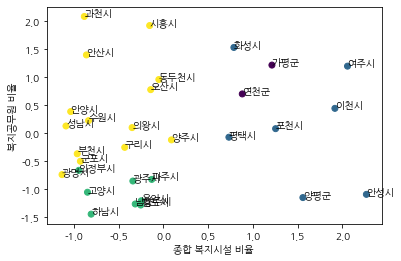

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['복지공무원 비율 ']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('복지공무원 비율 ')

Text(0, 0.5, '복지공무원 비율 ')

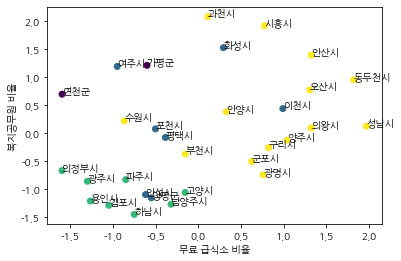

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['무료 급식소 비율']
y=data_prime['복지공무원 비율 ']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('무료 급식소 비율')
plt.ylabel('복지공무원 비율 ')

Text(0, 0.5, '도시락 배달 비율')

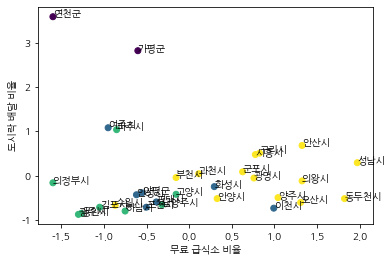

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['무료 급식소 비율']
y=data_prime['도시락 배달 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('무료 급식소 비율')
plt.ylabel('도시락 배달 비율')

# K Means 클러스터링

In [ ]:
data_prime = scaled.copy()

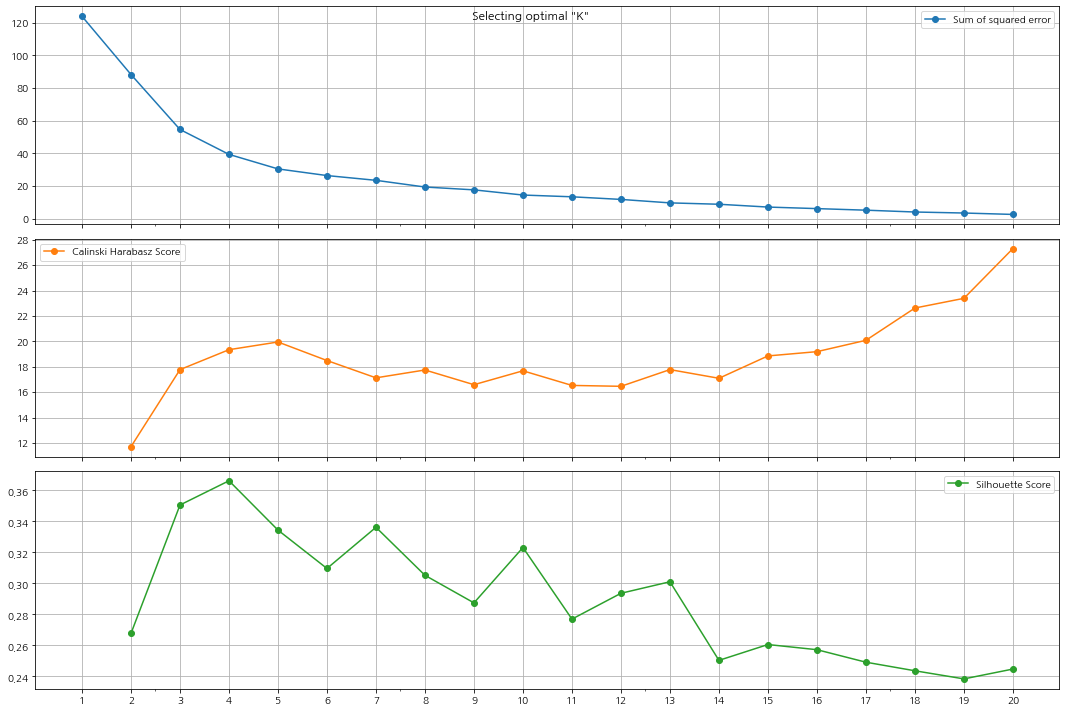

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

엘보우 기법 K=3

실루엣 기법 K=5

Calinski Harabasz score  K=4

실루엣, Calinski 둘 고려 k=4 

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=4, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=4, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 1, 3, 3, 1, 0, 0, 3,
       2, 3, 2, 1, 2, 1, 1, 2, 3], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율
0,1.383541,1.030228,2.504087,-1.049739
1,1.545603,-0.366363,-0.574101,-0.212947
2,-0.646145,-0.840377,-0.344682,-0.576553
3,-0.374990,0.802332,-0.045961,1.012053


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.415


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.425720
1    0.439222
2    0.430129
3    0.390973
Name: k_silhouette_coeff, dtype: float64

In [ ]:
data_prime

,종합 복지시설 비율,복지공무원 비율,도시락 배달 비율,무료 급식소 비율,k_means_cluster,k_silhouette_coeff
0,1.212486,1.208381,2.829248,-0.601457,0,0.583718
1,-0.848967,-1.063068,-0.422359,-0.153176,2,0.562185
2,-0.884156,2.076877,0.043704,0.112472,3,0.375022
3,-1.133407,-0.748119,-0.053844,0.759989,2,0.221513
4,-0.341668,-0.862646,-0.877584,-1.298784,2,0.485627
5,-0.432571,-0.261380,0.509768,0.826401,3,0.219599
6,-0.928141,-0.509521,0.087059,0.627165,2,0.194626
7,-0.253697,-1.292121,-0.715004,-1.049739,2,0.506214
8,-0.315277,-1.273034,-0.660810,-0.319206,2,0.498735
9,-0.051364,0.950696,-0.519908,1.822582,3,0.525991


Text(0, 0.5, '무료 급식소 비율')

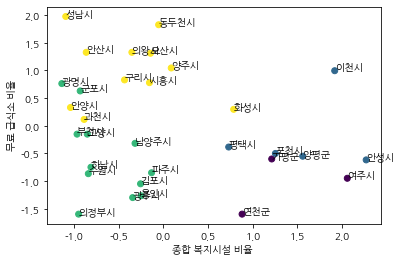

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['무료 급식소 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('무료 급식소 비율')

보라색 0번 클러스터 

파란색 1번 클러스터

초록색 2번 클러스터

노란색 3번 클러스터



종합복지시설 비율과 무료 급식소 비율이 낮은 클러스터2가 타겟 클러스터가 된다.

Text(0, 0.5, '도시락 배달 비율')

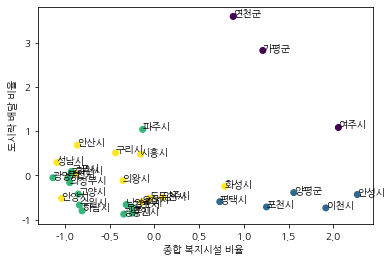

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['도시락 배달 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('도시락 배달 비율')

도시락 배달비율과 종합복지시설 비율이 모두 낮은 클러스터2와 클러스터 3이 타겟클러스터가 된다.

Text(0, 0.5, '복지공무원 비율 ')

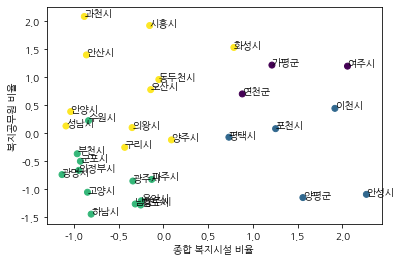

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['종합 복지시설 비율 ']
y=data_prime['복지공무원 비율 ']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('종합 복지시설 비율 ')
plt.ylabel('복지공무원 비율 ')

복지 공무원 비율과 종합 복지시설 비율이 모두 낮은 클러스터2가 타겟클러스터가 된다. 

Text(0, 0.5, '복지공무원 비율 ')

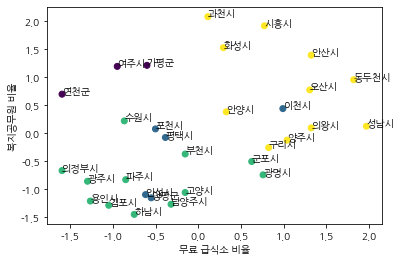

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['무료 급식소 비율']
y=data_prime['복지공무원 비율 ']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('무료 급식소 비율')
plt.ylabel('복지공무원 비율 ')

무료 급식소 비율과 복지 공무원비율이 모두 낮은 클러스터2가 타겟 클러스터가 된다 .

Text(0, 0.5, '도시락 배달 비율')

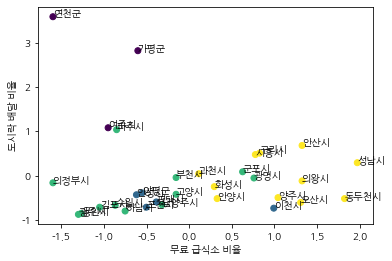

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['무료 급식소 비율']
y=data_prime['도시락 배달 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('무료 급식소 비율')
plt.ylabel('도시락 배달 비율')

무료 급식소 비율과 도시락 배달비율이 모두 낮은 1번클러스터와 2번 클러스터가타겟클러스터가 된다.

종합적으로 클러스터 2가 타겟 클러스터가 되고

광명시, 군포시, 부천시,고양시, 남양주시,하남시,수원시,파주시,김포시,용인시,광주시,의정부시가 타겟지역이 된다